In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 161M/161M [00:09<00:00, 18.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/versions/1


In [3]:
import shutil
import os
target_path = r'/content/input/'
if not os.path.exists(target_path):
    os.mkdir(target_path)
shutil.move(path, target_path)

'/content/input/1'

In [4]:
dir_path = r'/content/input/1/data'

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [6]:
def load_and_preprocess_data(dataset_path, img_size=(224, 224)):
    # Initialize data and labels
    data = []
    labels = []
    class_names = os.listdir(dataset_path)

    for label in class_names:
        label_path = os.path.join(dataset_path, label)
        for img_file in os.listdir(label_path):
            # Load image, resize, and convert to array
            img_path = os.path.join(label_path, img_file)
            image = load_img(img_path, target_size=img_size)
            image = img_to_array(image)
            data.append(image)
            labels.append(label)

    # Convert to numpy arrays
    data = np.array(data, dtype="float32") / 255.0  # Normalize images
    labels = np.array(labels)

    return data, labels, class_names

# Load the dataset
data, labels, class_names = load_and_preprocess_data(dir_path)

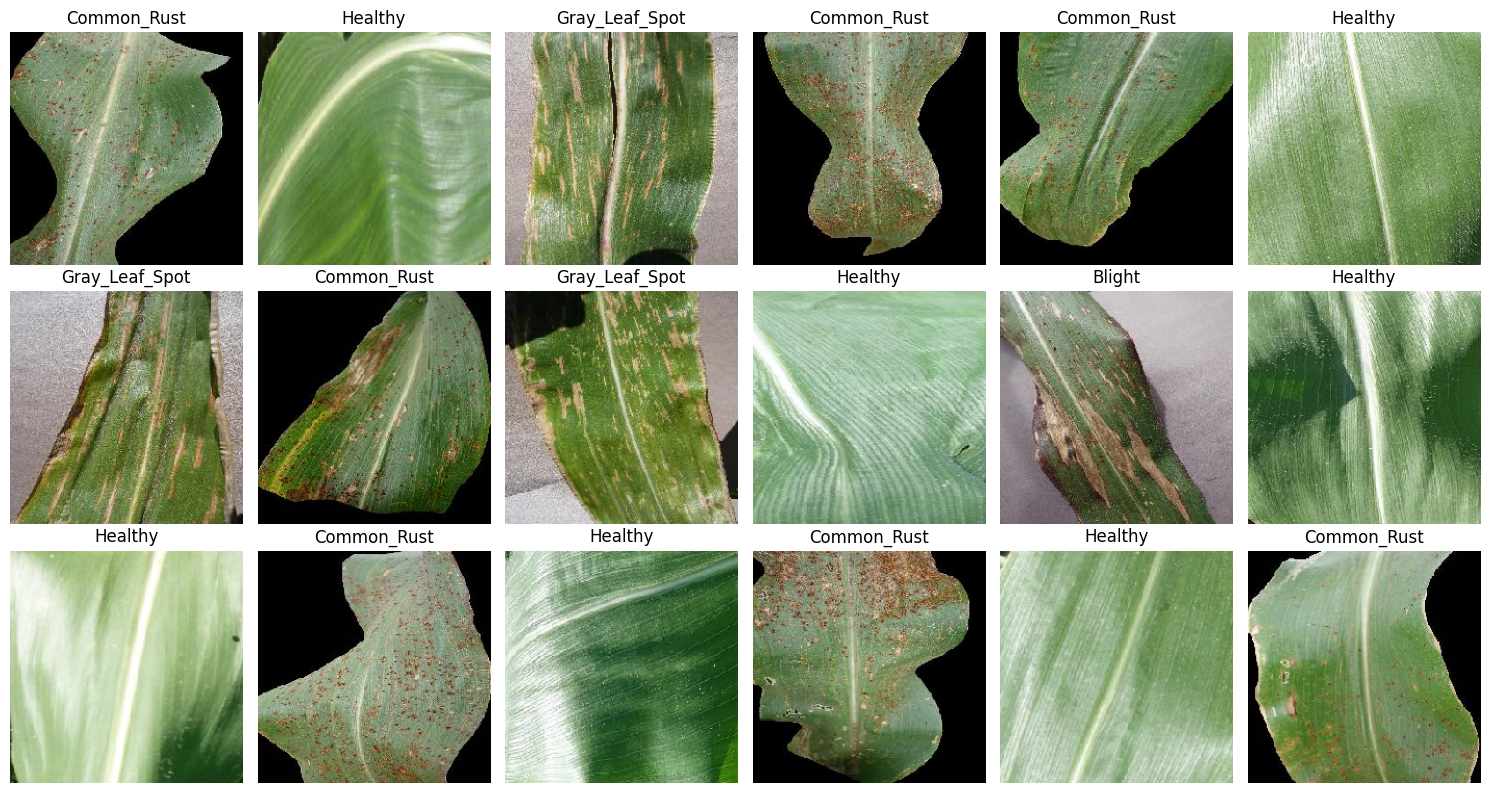

In [7]:
def plot_sample_images(data, labels, class_names, rows=3, cols=6):
    plt.figure(figsize=(15, 8))
    for i in range(rows * cols):
        index = np.random.randint(0, len(data))
        plt.subplot(rows, cols, i + 1)
        plt.imshow(data[index])
        plt.title(labels[index])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the sample images
plot_sample_images(data, labels, class_names)

In [8]:
from sklearn.preprocessing import LabelBinarizer

# Encode labels into one-hot format
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(3350, 224, 224, 3)

In [10]:
y_train.shape

(3350, 4)

In [11]:
def create_model(model_name='VGG16', input_shape=(224, 224, 3), num_classes=3):
    if model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNetV2':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError(f"Model {model_name} is not supported.")

    # Freeze base model layers
    base_model.trainable = False

    # Build the model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [12]:
# List of model names to iterate through
model_names = ['VGG16', 'DenseNet121', 'InceptionV3', 'MobileNetV2']

# Dictionary to store model histories and weights
model_weights = {}
histories = []
# Iterate over each model name
for model_name in model_names:
    print(f"\nTraining model: {model_name}")

    # Create the model
    model = create_model(model_name, input_shape=(224, 224, 3), num_classes=4)


    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=5,  # Adjust the number of epochs as needed
        batch_size=100,  # Adjust batch size as necessary
    )

    # Save the model's training history and weights to a dictionary
    model_weights[model_name] = model
    histories.append(history)


Training model: VGG16
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.3280 - loss: 1.3451 - val_accuracy: 0.7649 - val_loss: 1.0480
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 529ms/step - accuracy: 0.7647 - loss: 0.9629 - val_accuracy: 0.7637 - val_loss: 0.8405
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 537ms/step - accuracy: 0.7755 - loss: 0.7856 - val_accuracy: 0.7840 - val_loss: 0.7111
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 584ms/step - accuracy: 0.7957 - loss: 0.6770 - val_accuracy: 0.7912 - val_loss: 0.6286
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 534ms/step - accuracy: 0.8075 - loss: 0.6013 - val_accuracy: 0.8079 - val_loss: 0.5655

Training model: DenseNet121
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6693 - loss: 0.8759 - val_accuracy: 0.8699 - val_loss: 0.3760
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 276ms/step - accuracy: 0.8851 - loss: 0.335

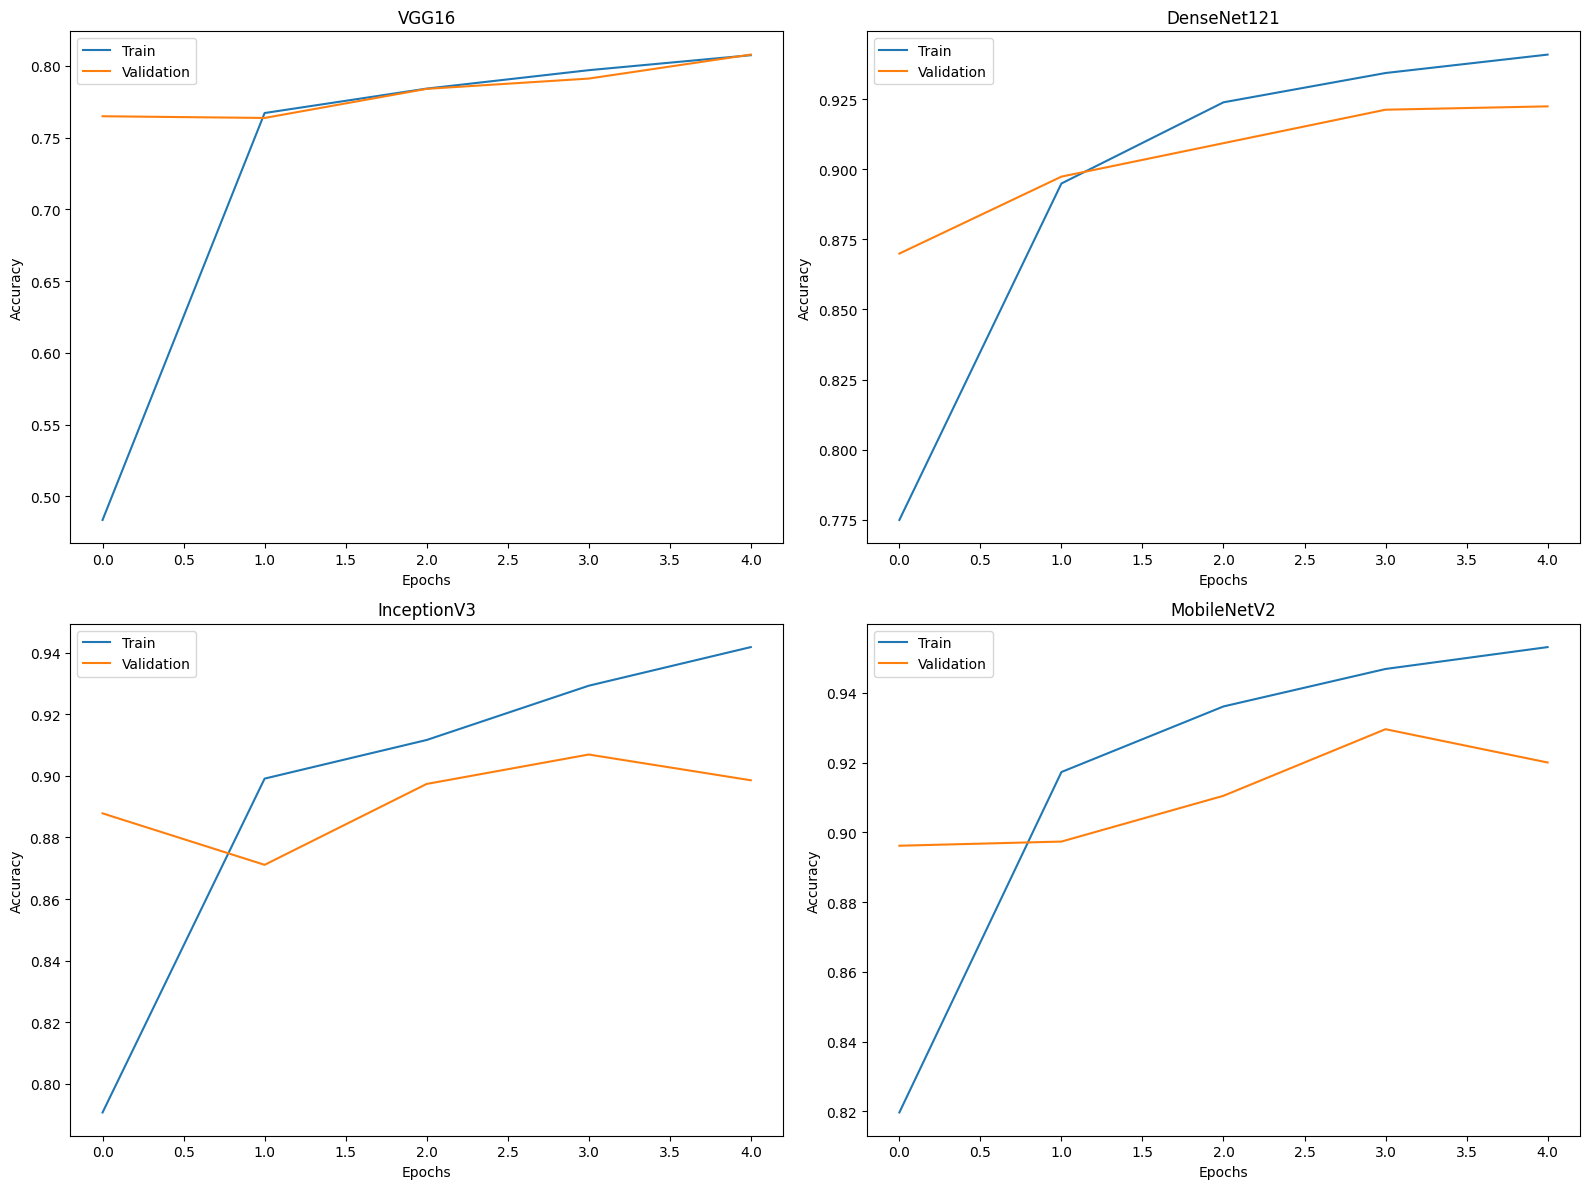

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the 2D array of axes to make looping easier
axs = axs.ravel()

# Loop over the models and plot the accuracy and validation accuracy
for i, history in enumerate(histories):
    axs[i].plot(history.history['accuracy'])
    axs[i].plot(history.history['val_accuracy'])
    axs[i].legend(['Train', 'Validation'])
    axs[i].set_xlabel('Epochs')
    axs[i].set_title(model_names[i])
    axs[i].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


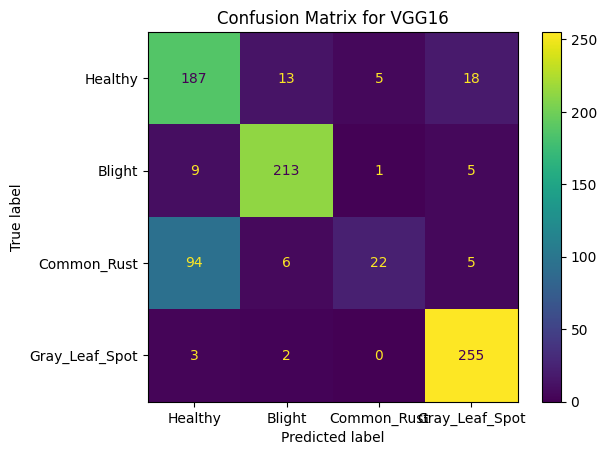

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 263ms/step


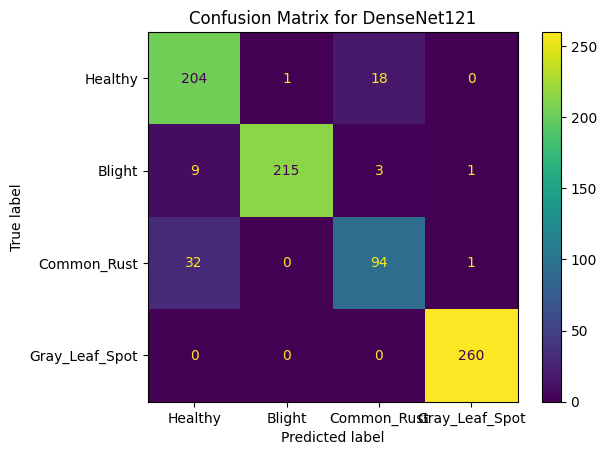

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step


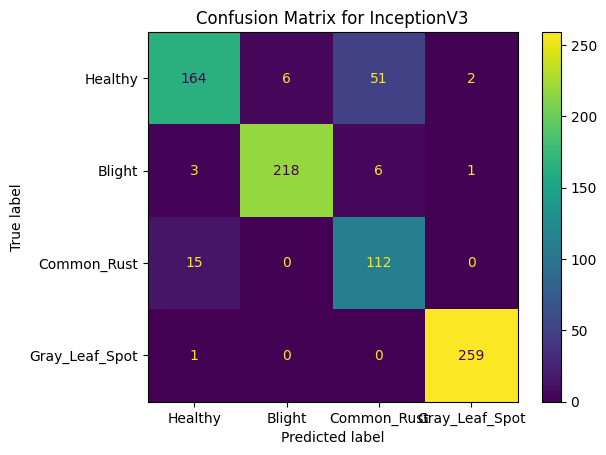

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


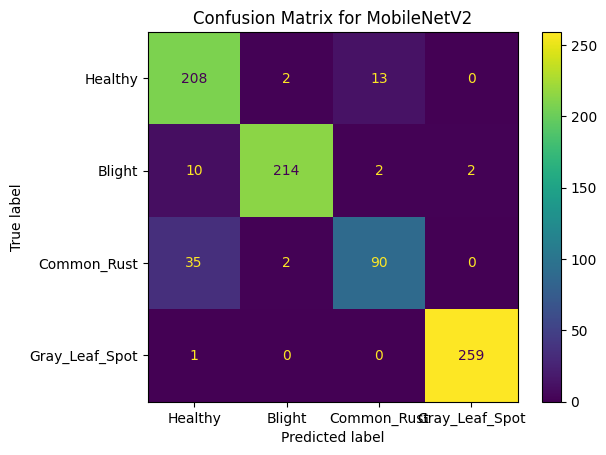

In [18]:
# prompt: plot confusion matrix for four models

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test contains true labels and model_weights contains trained models
# Iterate through models and generate confusion matrices
for model_name in model_names:
    model = model_weights[model_name]
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true_classes, y_pred_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import array_to_img

def output_plot(image, model):
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    predictions = model.predict(image.reshape(1, 224, 224, 3))

    axs[0].imshow(array_to_img(image))
    axs[0].axis('off')
    prediction_values = predictions[0]

    max_index = np.argmax(prediction_values)
    colors = ['green' if i == max_index else 'blue' for i in range(len(class_names))]

    axs[1].barh(class_names, prediction_values, color=colors)
    axs[1].set_xlim([0, 1])

    plt.tight_layout()
    plt.show()


In [16]:
for model_name, model in model_weights.items():
    print(f"\nEvaluating model: {model_name}")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"{model_name} - Test Accuracy: {test_accuracy * 100:.2f}%")


Evaluating model: VGG16
27/27 - 21s - 784ms/step - accuracy: 0.8079 - loss: 0.5655
VGG16 - Test Accuracy: 80.79%

Evaluating model: DenseNet121
27/27 - 20s - 745ms/step - accuracy: 0.9224 - loss: 0.2107
DenseNet121 - Test Accuracy: 92.24%

Evaluating model: InceptionV3
27/27 - 14s - 501ms/step - accuracy: 0.8986 - loss: 0.2603
InceptionV3 - Test Accuracy: 89.86%

Evaluating model: MobileNetV2
27/27 - 4s - 158ms/step - accuracy: 0.9200 - loss: 0.2050
MobileNetV2 - Test Accuracy: 92.00%




Testing - VGG16 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


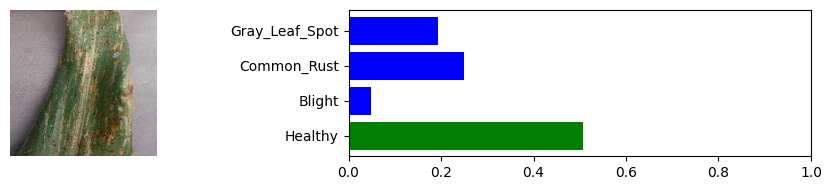



Testing - VGG16 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


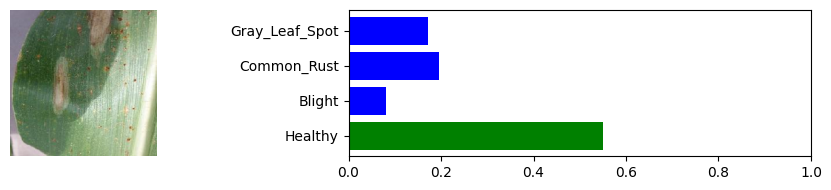



Testing - VGG16 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


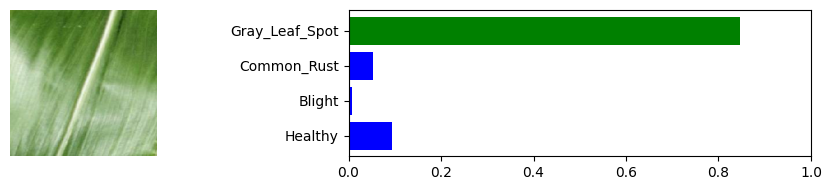



Testing - VGG16 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


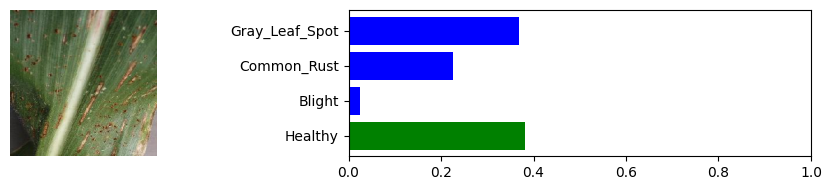



Testing - DenseNet121 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


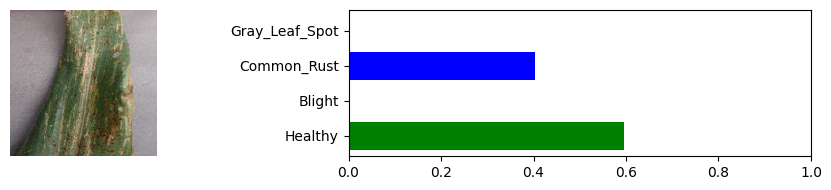



Testing - DenseNet121 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


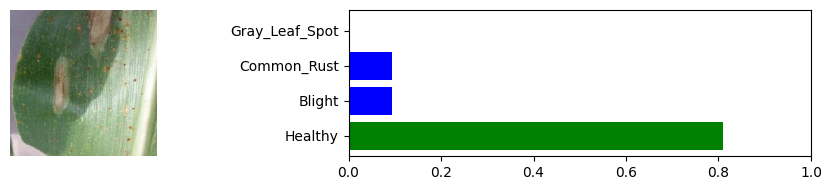



Testing - DenseNet121 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


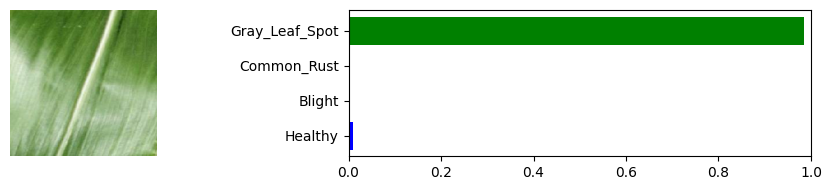



Testing - DenseNet121 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


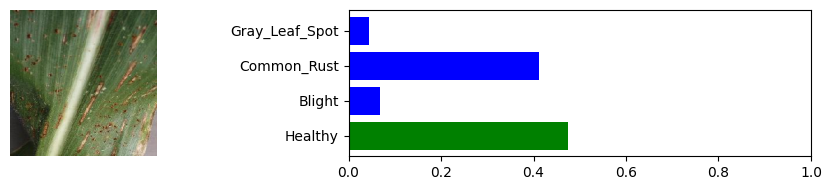



Testing - InceptionV3 Model



1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


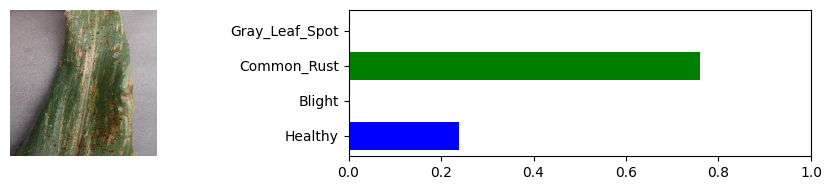



Testing - InceptionV3 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


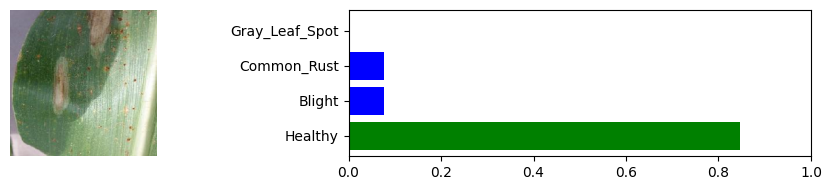



Testing - InceptionV3 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


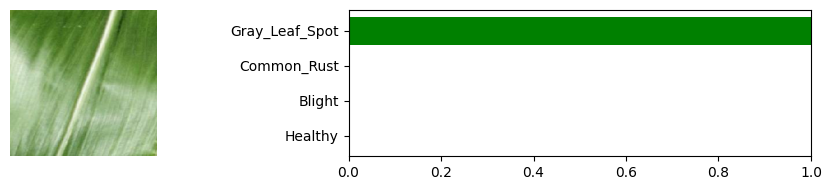



Testing - InceptionV3 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


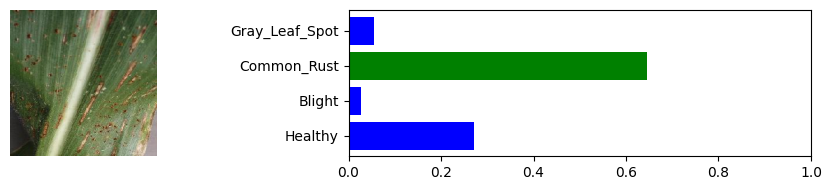



Testing - MobileNetV2 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


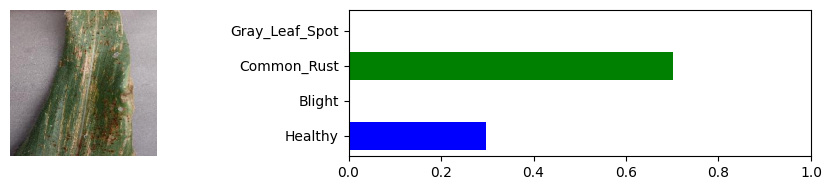



Testing - MobileNetV2 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


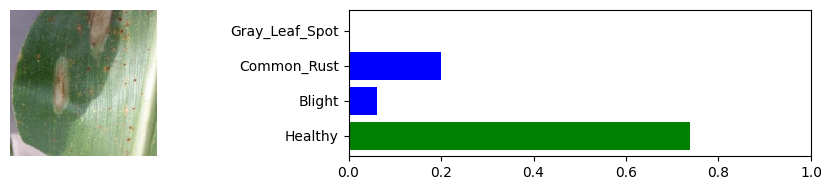



Testing - MobileNetV2 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


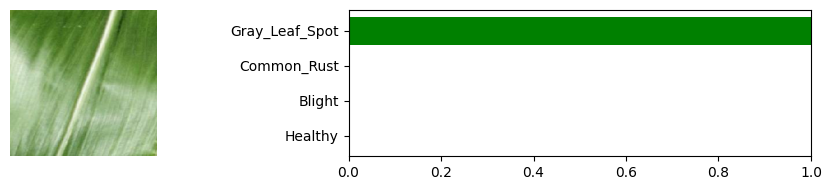



Testing - MobileNetV2 Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


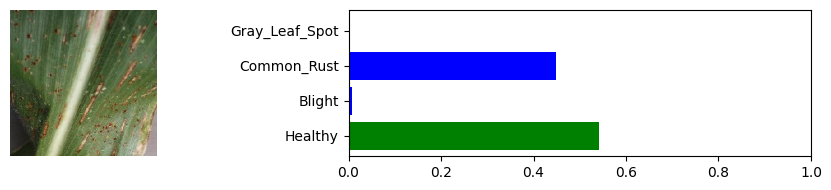

In [17]:
for model_name in model_names:
    for i in X_test[1:5]:
        print(f"\n\nTesting - {model_name} Model\n")
        output_plot(i, model_weights[model_name])